In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
import warnings
warnings.filterwarnings("ignore")


In [133]:
dataset = pd.read_csv("liver_cirrhosis - 9000rows.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [134]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,2,4,5,6,7,8])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))


#Encoding categorical data
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1]) # for first column
X[:, 2] = labelencoder_X.fit_transform(X[:, 2]) # for first column
X[:, 4] = labelencoder_X.fit_transform(X[:, 4]) # for first column
X[:, 5] = labelencoder_X.fit_transform(X[:, 5]) # for first column
X[:, 6] = labelencoder_X.fit_transform(X[:, 6]) # for first column
X[:, 7] = labelencoder_X.fit_transform(X[:, 7]) # for first column
X[:, 8] = labelencoder_X.fit_transform(X[:, 8]) # for first column
X


array([[2221, 0, 1, ..., 57.0, 256.0, 9.9],
       [1230, 0, 1, ..., 75.0, 220.0, 10.8],
       [4184, 0, 1, ..., 80.0, 225.0, 10.0],
       ...,
       [4509, 0, 1, ..., 86.0, 200.0, 10.8],
       [3853, 2, 1, ..., 63.0, 273.0, 10.6],
       [2644, 0, 1, ..., 124.7021277, 311.0, 9.7]], dtype=object)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [136]:
X_train[4]

array([1702, 0, 0, 18806, 0, 0, 0, 0, 0, 1.1, 414.0, 3.45, 80.0, 1003.0,
       99.0, 55.0, 271.0, 9.6], dtype=object)

In [137]:
y_train[4]

1

In [138]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [140]:
from sklearn.preprocessing import LabelEncoder

# Encode the classes in y_train
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [141]:
X_train

array([[ 0.5360196 ,  0.16567663, -1.30756491, ...,  0.13037722,
         0.576127  ,  0.51815514],
       [-0.42003184, -0.89547924, -1.30756491, ...,  1.39440348,
         0.15436074, -1.29718212],
       [ 1.26594724,  1.22683251,  0.76478039, ..., -0.56969886,
        -0.15694293,  1.87965809],
       ...,
       [ 0.07653604, -0.89547924,  0.76478039, ..., -0.95863001,
        -0.79963438, -1.29718212],
       [ 0.5360196 ,  0.16567663, -1.30756491, ..., -0.10298147,
         0.576127  ,  0.51815514],
       [-1.07759986, -0.89547924,  0.76478039, ...,  0.02735184,
        -1.11093806, -0.38951349]])

In [142]:
y_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [143]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [144]:
y_pred = classifier.predict(X_test)

In [149]:
Y_pred_new = classifier.predict(sc.transform([[1702, 0, 0, 18806, 0, 0, 0, 0, 0, 1.1, 414.0, 3.45, 80.0, 1003.0,
       99.0, 55.0, 271.0, 9.6]]))

In [150]:
Y_pred_new

array([0], dtype=int64)

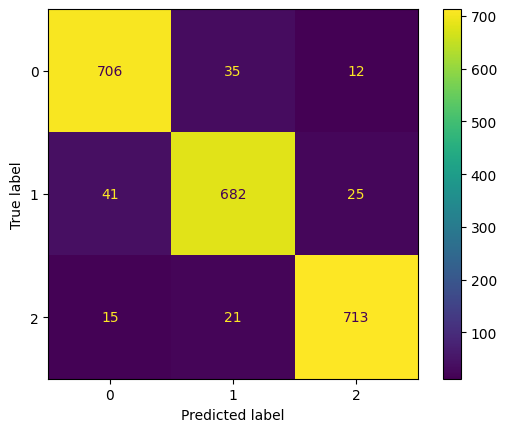

In [145]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm1)
disp.plot()
plt.show()

In [146]:
from sklearn.metrics import precision_score, recall_score,r2_score,f1_score,accuracy_score
accuracy = accuracy_score(y_test,y_pred)

precisionXG = precision_score(y_test,y_pred, average="weighted")
recallXG = recall_score(y_test,y_pred,average="weighted")
f1ScoreXG = f1_score(y_test,y_pred,average="weighted")

print("Accuracy:", accuracy)
print("precision: ",precisionXG)
print("recall: ",recallXG)
print("f1_score: ",f1ScoreXG)


Accuracy: 0.9337777777777778
precision:  0.9337564191413743
recall:  0.9337777777777778
f1_score:  0.9337421298574576


In [147]:
import pickle
with open('liver2.pkl','wb') as files:
    pickle.dump(classifier,files)

In [148]:
import pickle
with open('scaler.pkl','wb') as files:
    pickle.dump(sc,files)